# Understanding the Amazon from Space 

### Objective:
Label satellite image chips with atmospheric conditions and various classes of land cover/land use. 

Available labels are: *agriculture, artisinal_mine, bare_ground, blooming, blow_down, clear, cloudy, conventional_mine, cultivation, habitation, haze, partly_cloudy, primary, road, selective_logging, slash_burn, water*

### 1. Read Data and Basic Analysis

In [2]:
import pandas as pd

# read our data and take a look at what we are dealing with
train_csv = pd.read_csv('./train.csv')
train_csv.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [3]:
# how much data do we have?
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40479 entries, 0 to 40478
Data columns (total 2 columns):
image_name    40479 non-null object
tags          40479 non-null object
dtypes: object(2)
memory usage: 632.6+ KB


#### Observations
- First objective will be to extract and and split the tag data into binary feature columns to be analyzed seperately.

In [4]:
import numpy as np

AVAILABLE_LABELS = [
    'agriculture', 
    'artisinal_mine', 
    'bare_ground', 
    'blooming', 
    'blow_down', 
    'clear', 
    'cloudy', 
    'conventional_mine', 
    'cultivation', 
    'habitation', 
    'haze', 
    'partly_cloudy', 
    'primary', 
    'road', 
    'selective_logging', 
    'slash_burn', 
    'water']

tags = pd.DataFrame()

for label in AVAILABLE_LABELS:
    tags[label] = train_csv.tags.apply(lambda x: np.where(label in x, 1, 0))
    
train = pd.concat([train_csv.image_name, tags], axis=1)
train.head()

,image_name,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,train_2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,train_3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,train_4,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0


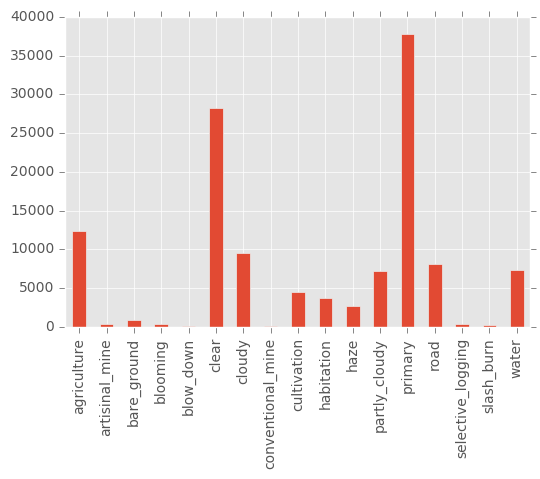

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

train.drop('image_name', 1).sum().plot(kind='bar')
plt.show()

#### Observations
- Some labels have almost no samples
- The 'primary' tag has almost no negative samples.
- Clear seems to have the best class balance, and might be the best place to start

### View Image Data

#### Observations
- Files are in .tif (GeoTiff) format. Need to research python support and how to work with these files

In [1]:
# load data

# view first 5 cloudy images

#### Proposed Initial Approach
From analyzing the sample data, our initial approach might be to train a neural network to identify a single tag. Based on the class balance, we will use

### 2. Training

### 3. Evaluation